## Michaelis-Menten reaction rate equations

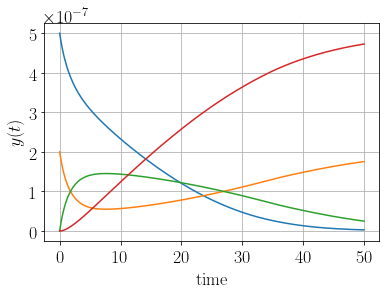

In [48]:
# Numerical solution of the reaction rate equations of the Michaelis-Menten system.
#
# Parameters from Chapter 7 of
# Stochastic Modelling for Systems Biology,
# by Darren J. Wilkinson, Chapman & Hall/CRC, 2006.
#
# Translated from:
# D.J. Higham "Modeling and Simulating Chemical Reactions" SIAM REVIEW 2008 50(2) p. 347–368
# http://www.maths.strath.ac.uk/˜aas96106/algfiles.html

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

def michaelis_menten(y,t,k):
    dydt = np.zeros((4,1));
    y1, y2, y3, y4 = y;
    k1, k2, k3 = k;
    dydt = [-k1*y1*y2 + k2*y3,
            -k1*y1*y2 + (k2+k3)*y3,
            k1*y1*y2 - (k2+k3)*y3,
            k3*y3]
    return dydt

k1 = 1e6; k2 = 1e-4; k3 = 0.1;
k = [k1, k2, k3]

# Initial condition
y1 = 5e-7; y2 = 2e-7; y3 = 0.0; y4 = 0.0;
y0 = [y1, y2, y3, y4]

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50.0
numpoints = 250

# Create the time samples for the output of the ODE solver
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Solve ODE
y = odeint(michaelis_menten, y0, t, args=(k,), atol=abserr, rtol=relerr)

# Use LaTeX fonts
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=18)

plt.grid(True)

# Plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('$y(t)$')
plt.show()